## Doctor Right


#### Import Library

In [1]:
import sys
sys.path.append("../modules")
from eda import EDAAnalyzer
from spark_session import SparkManager
from feature_engineering import FeatureEngineer

In [2]:
# Load autoreload extension
%load_ext autoreload
%autoreload 2

#### Constants and config

In [11]:
mx_submits_path = "../data_sample/mx_submits.parquet/"
mx_submits_line_path = "../data_sample/mx_submitsline.parquet/"
cohort_key="767ef4cac69e8a0c77384f6e1414364b"

sample_patient_id = "8aad41f612a7095449888c8050abaeb05fdee65643caa3033542610421d8bd1daaa2c4ce1757401003a1bbcd60948a7aa13eba507a676dea80e0cf76b77dbc95"
features_cols = [
'secondary_payer_state',
'facility_provider_address_region',
'patient_gender',
'patient_location_residential_region',
'principal_diagnosis_body_part',
'principal_diagnosis_category',
'claim_all_diagnosis_codes',
'claim_total_charge_amount',
'continuous_visit_years',
'previous_diagnosis_ohe']
exclude_cols = ['patient_id']
most_reapeated_diagnosis_5char = ['G4733', 'Z0000', 'F1120', 'Z1231', 'R6889', 'Z1211', 'I2510', 'R0602', 'M6281', 
                                  'R0789', 'I2510', 'E1165', 'M1711', 'I4891', 'F1220', 'M6281', 'M5416', 'I2510', 
                                  'I2510', 'M9901', 'F4323', 'Z0001', 'M5450', 'Z7901', 'R0602', 'M6281', 'J9601', 
                                  'F1020', 'R5383', 'M5412']

most_repeated_diagnosis_list = [] 

### Spark Session

In [4]:
mx_submits_spark_manager = SparkManager(mx_submits_path)
# mx_submits_spark_manager = SparkManager(cohort_key=cohort_key)
# mx_submits_line_spark_manager = SparkManager(mx_submits_line_path)

24/10/10 14:20:19 WARN Utils: Your hostname, Sureshs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 172.20.9.214 instead (on interface en0)
24/10/10 14:20:19 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/10 14:20:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### MX SUBMITS

#### EDA

In [5]:
mx_submits_eda = EDAAnalyzer(mx_submits_spark_manager)

In [6]:
mx_submits_eda.display_head()

24/10/01 22:30:35 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,claim_number,cohort_key,cohort_record_id,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,...,type_of_bill_frequency_description,vendorname,cycle_id,patient_birth_year,patient_gender,patient_id,patient_location_preferred_latitude,patient_location_preferred_longitude,patient_location_preferred_zipcode,patient_location_preferred_type
0,a6db914db401522b72e75765b0c8915a,f74909ace68e51891440e4da0b65a70c,323f1fff09390aad4c11c4e3c3d694fe,None,"LAS VEGAS-HENDERSON-PARADISE, NV",Henderson,Clark,3005WHORIZONRIDGEPKWYHENDERSONNV89052,35.998154,-115.119797,...,None,cyan,full_20240611,1944,M,e0e2f2ab3660008f963219f5da377d1e16b302a936951c...,None,None,None,NaN
1,28cd641bca90ccc956666d3d427208f2,6e116682aeba6cd8a5341a9bc3b6f020,da4a4cff3fb363e215eca0779812b117,None,"PARSONS, KS",Parsons,Labette,1902SUSHIGHWAY59PARSONSKS67357,37.320053,-95.264801,...,Admit Through Discharge Claim,cyan,full_20240611,1943,F,64bf854d4bc6350af1c5edc74fe816d23d9d9ecc965cae...,37.676598,-95.472107,66720,1.0
2,7c2a727611dca1435166631a665b7f21,767ef4cac69e8a0c77384f6e1414364b,f4048466449529193e43c6231c6b4f80,None,"PHILADELPHIA-CAMDEN-WILMINGTON, PA-NJ-DE-MD",Woodbury,Gloucester,26EREDBANKAVEWOODBURYNJ08096,39.843605,-75.148361,...,Admit Through Discharge Claim,cyan,full_20240611,1971,M,be3296ca5e261d0300048ece4a74ce6d775f3449a77702...,40.227833,-75.240562,19454,1.0
3,6d014626abbddd193950839be7859c43,0e6b9e4a0d9103c5a9c4f1332d38ef53,781bac90c394b3566e29c81dc925ed3d,None,"MONTGOMERY, AL",Montgomery,Montgomery,2055NORMANDIEDRMONTGOMERYAL36111,32.328972,-86.27977,...,Admit Through Discharge Claim,cyan,full_20240611,1946,F,0025ac2b4ff09bd1505307140b30a7c7f53f9645efa5f4...,32.902707,-85.382338,36855,2.0
4,dfd62d19b9ec0891cf714d5d486736d,767ef4cac69e8a0c77384f6e1414364b,adf9dafa1dc75bec5f501c724d275b46,None,"AUSTIN-ROUND ROCK-GEORGETOWN, TX",Austin,Travis,2170WOODWARDSTAUSTINTX78744,30.212395,-97.745186,...,None,cyan,full_20240611,1996,M,59baeef7b06d85ab2f180a860201c2c1e8c931d48b614c...,40.742847,-82.530979,44903,1.0


In [7]:
mx_submits_eda.display_shape()

'Shape of data: rows: 247334, cols: 127'

#### Type conversion

In [6]:
mx_submits_eda.convert_columns_to_float(["claim_total_charge_amount"])

Casted claim_total_charge_amount to float


In [6]:
column_info_submits = mx_submits_eda.display_column_info()
column_info_submits.to_csv("../output/column_info_submits.csv")
column_info_submits

24/09/29 17:51:08 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,Column Name,Non-null Count,Percent Non-null,Min Value,Max Value,Max Repeats,Sample,Data Type,most_frequent_value,max_repeats,distinct_count
0,claim_number,247334,100.000000,28,32,1.0,a6db914db401522b72e75765b0c8915a,string,4182b93e71c2c46d88683dd749d3cc04,1.0,247334
1,vendorname,247334,100.000000,4,4,247334.0,cyan,string,cyan,247334.0,1
2,clearinghouse_received_date,247334,100.000000,2015-01-02,2024-09-06,4037.0,2019-09-05,date,2018-02-03,4037.0,3531
3,cohort_key,247334,100.000000,32,32,62351.0,f74909ace68e51891440e4da0b65a70c,string,f74909ace68e51891440e4da0b65a70c,62351.0,4
4,claim_id,247334,100.000000,28,32,1.0,a6db914db401522b72e75765b0c8915a,string,a34f778795a121c257567fd41ffe839e,1.0,247334
...,...,...,...,...,...,...,...,...,...,...,...
122,secondary_payer_plan_type,2542,1.027760,7,20,244792.0,None,string,None,244792.0,8
123,operating_provider_npi,2026,0.819135,10,10,245308.0,None,string,None,245308.0,1100
124,inpatient_admitting_diagnosis_code,1828,0.739082,2,7,245506.0,None,string,None,245506.0,526
125,drg_code,777,0.314150,3,9,246557.0,None,string,None,246557.0,295


In [10]:
column_info_submits[column_info_submits["Column Name"]=="claim_total_charge_amount"]

,Column Name,Non-null Count,Percent Non-null,Min Value,Max Value,Max Repeats,Sample,Data Type,most_frequent_value,max_repeats
14,claim_total_charge_amount,246797,99.782885,-203.160004,924144.125,3212.0,23135.0,float,150.0,3212.0


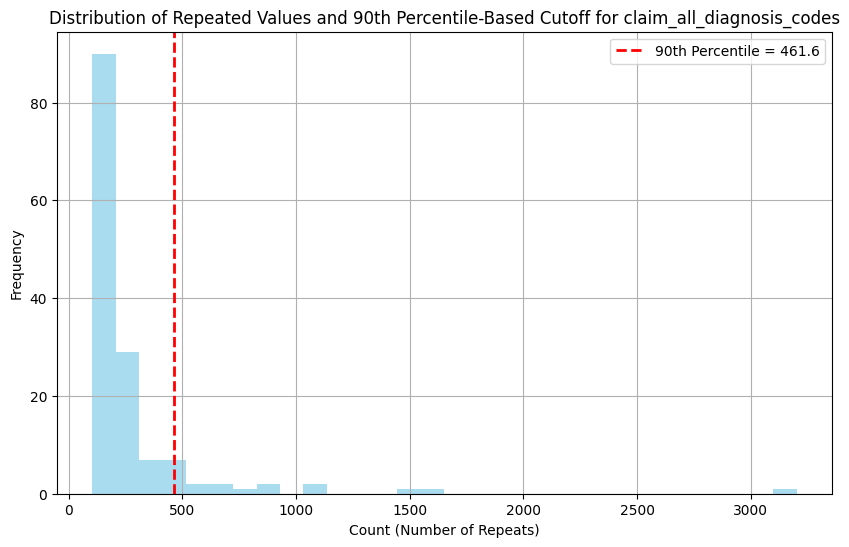

In [11]:
mx_submits_eda.plot_percentile_based_cutoff("claim_all_diagnosis_codes",90,cutoff_length=5)

In [8]:
mx_submits_claim_all_diagnosis_codes_repeat_count = mx_submits_eda.get_top_n_repeated_values("claim_all_diagnosis_codes")
mx_submits_claim_all_diagnosis_codes_repeat_count

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5.0
1,"(ICD10, I10, 1)",4651,I10,3.0
2,"(ICD10, I10, 2)",4584,I10,3.0
3,"(ICD10, Z0000, 1)",3802,Z0000,5.0
4,"(ICD10, I10, 3)",3740,I10,3.0
...,...,...,...,...
46888,"(ICD10, I671, A)",1,I671,4.0
46889,"(ICD9, 33383, 1)",1,33383,5.0
46890,"(ICD10, E222, 5)",1,E222,4.0
46891,"(ICD10, S32511A, A)",1,S32511A,7.0


In [9]:
most_repeated_diagnosis = mx_submits_claim_all_diagnosis_codes_repeat_count[
    (mx_submits_claim_all_diagnosis_codes_repeat_count["diagnosis_code_length"] == 5) & 
    (mx_submits_claim_all_diagnosis_codes_repeat_count["count"] > 461)
]
most_repeated_diagnosis_list = most_repeated_diagnosis['diagnosis_code'].tolist()
most_repeated_diagnosis

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5.0
3,"(ICD10, Z0000, 1)",3802,Z0000,5.0
5,"(ICD10, F1120, 1)",3573,F1120,5.0
13,"(ICD10, Z1231, 1)",1944,Z1231,5.0
14,"(ICD10, R6889, 1)",1935,R6889,5.0
28,"(ICD10, Z1211, 1)",1202,Z1211,5.0
29,"(ICD10, I2510, 1)",1152,I2510,5.0
43,"(ICD10, R0602, 1)",956,R0602,5.0
48,"(ICD10, M6281, 2)",889,M6281,5.0
57,"(ICD10, R0789, 1)",800,R0789,5.0


In [10]:
most_repeated_diagnosis_list

['G4733',
 'Z0000',
 'F1120',
 'Z1231',
 'R6889',
 'Z1211',
 'I2510',
 'R0602',
 'M6281',
 'R0789',
 'I2510',
 'E1165',
 'M1711',
 'I4891',
 'F1220',
 'M6281',
 'M5416',
 'I2510',
 'I2510',
 'M9901',
 'F4323',
 'Z0001',
 'M5450',
 'Z7901',
 'R0602',
 'M6281',
 'J9601',
 'F1020',
 'R5383',
 'M5412']

In [14]:
most_repeated_diagnosis = mx_submits_claim_all_diagnosis_codes_repeat_count[mx_submits_claim_all_diagnosis_codes_repeat_count['diagnosis_code_length'==5] && mx_submits_claim_all_diagnosis_codes_repeat_count["count"]>=531]
most_repeated_diagnosis

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5.0
1,"(ICD10, I10, 1)",4651,I10,3.0
2,"(ICD10, I10, 2)",4584,I10,3.0
3,"(ICD10, Z0000, 1)",3802,Z0000,5.0
4,"(ICD10, I10, 3)",3740,I10,3.0
...,...,...,...,...
98,"(ICD10, J441, 1)",544,J441,4.0
99,"(ICD10, J189, 1)",540,J189,4.0
100,"(ICD10, Z452, 1)",539,Z452,4.0
101,"(ICD10, F4323, 1)",534,F4323,5.0


 - (ICD10, Z0001, 1): Encounter for general adult medical examination with abnormal findings
 - (ICD10, F4323, 1): Adjustment disorder with depressed mood
 - (ICD10, Z452, 1)	: Pneumonia, unspecified organism
 - (ICD10, J441, 1)	: Chronic obstructive pulmonary disease with acute exacerbation

In [15]:
mx_submits_eda.get_top_n_repeated_values("claim_all_diagnosis_codes",5)

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5
1,"(ICD10, I10, 1)",4651,I10,3
2,"(ICD10, I10, 2)",4584,I10,3
3,"(ICD10, Z0000, 1)",3802,Z0000,5
4,"(ICD10, I10, 3)",3740,I10,3


In [16]:
type_of_bill_facility_description_eda = mx_submits_eda.get_fill_counts_for_unique_values("type_of_bill_facility_description")
type_of_bill_facility_description_eda

,Unique Value,Column,type_count,Non-null Count,Percent Non-null
0,Skilled Nursing,claim_number,721,721,100.000000
1,Skilled Nursing,cohort_key,721,721,100.000000
2,Skilled Nursing,cohort_record_id,721,721,100.000000
3,Skilled Nursing,attending_provider_npi,721,112,15.533981
4,Skilled Nursing,billing_provider_address_cbsa_name,721,465,64.493759
...,...,...,...,...,...
877,None,patient_id,213257,213244,99.993904
878,None,patient_location_preferred_latitude,213257,188763,88.514328
879,None,patient_location_preferred_longitude,213257,188763,88.514328
880,None,patient_location_preferred_zipcode,213257,188763,88.514328


In [17]:
type_of_bill_facility_description_eda[type_of_bill_facility_description_eda["Column"]=='facility_provider_address_city']

,Unique Value,Column,type_count,Non-null Count,Percent Non-null
37,Skilled Nursing,facility_provider_address_city,721,5,0.693481
163,Intermediate Care,facility_provider_address_city,10,0,0.000000
289,Hospital,facility_provider_address_city,23494,457,1.945177
415,Home Health,facility_provider_address_city,2873,0,0.000000
541,"Specialty Facility, Hospital ASC Surgery",facility_provider_address_city,2196,202,9.198543
667,Clinic,facility_provider_address_city,4783,651,13.610705
793,None,facility_provider_address_city,213257,78679,36.893982


### MX SUBMITS LINE

#### EDA

In [5]:
mx_submits_line_eda = EDAAnalyzer(mx_submits_line_spark_manager)

In [6]:
mx_submits_line_eda.display_head()

24/10/02 21:09:08 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,billing_provider_address_precision,billing_provider_address_region,billing_provider_address_state,...,line_level_procedure_modifier_1,line_level_procedure_modifier_2,line_level_procedure_modifier_3,line_level_procedure_modifier_4,line_level_procedure_category,line_level_revenue_code,line_level_revenue_description,line_level_from_date,line_level_to_date,line_level_units_billed
0,None,"ELKHART-GOSHEN, IN",Goshen,Elkhart,200HIGHPARKAVEGOSHENIN46526,41.563358,-85.830498,Rooftop,Midwest,IN,...,None,None,None,None,PATHOLOGY AND LABORATORY - ORGAN OR DISEASE-OR...,0301,Laboratory,2023-12-29,2023-12-29,1.00
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,SUPPLEMENTAL TRACKING(CATEGORY II) - PATIENT H...,0572,None,2021-07-01,2021-07-01,1.00
2,None,"NEW YORK-NEWARK-JERSEY CITY, NY-NJ-PA",Raritan,Somerset,691STAVERARITANNJ08869,40.56961,-74.63822,Zip9,Northeast,NJ,...,None,None,None,None,None,None,None,2016-02-25,2016-02-25,1.00
3,None,None,Stowe,Lamoille,1878MOUNTAINRDSTOWEVT05672,44.474545,-72.713554,Rooftop,Northeast,VT,...,None,None,None,None,EVALUATION AND MANAGEMENT - PROLONGED SERVICES,None,None,2021-07-26,2021-07-26,1.00
4,None,"PHOENIX-MESA-CHANDLER, AZ",Chandler,Maricopa,3960ERIGGSRDCHANDLERAZ85249,33.219654,-111.774361,Rooftop,West,AZ,...,None,None,None,None,SUPPLEMENTAL TRACKING(CATEGORY II) - PATIENT H...,None,None,2024-08-06,2024-08-06,1.00


In [7]:
mx_submits_line_eda.display_shape()

'Shape of data: rows: 649030, cols: 150'

In [ ]:
column_info_submits_line = mx_submits_line_eda.display_column_info()
column_info_submits_line.to_csv("../output/column_info_submits_line.csv")
column_info_submits_line

In [6]:
# mx_submits_fe.transform_claim_all_diagnosis_codes()

,claim_all_diagnosis_ohe
0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"(1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Feature Engineering

In [12]:
mx_submits_fe=FeatureEngineer(mx_submits_spark_manager)

In [13]:
mx_submits_fe.add_comorbidities_with_exponential_decay_sparse_vector()

,previous_diagnosis_ohe
0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [6]:
cv = mx_submits_fe.add_continuous_visit_years()
mx_submits_fe.display_top_rows_as_pandas("continuous_visit_years")
cv

In [9]:
# mx_submits_fe.remove_diagnosis_codes(most_repeated_diagnosis_list)

In [9]:
mx_submits_fe.retain_columns(features_cols)

In [11]:
mx_submits_fe.convert_columns_to_float(["claim_total_charge_amount"])
preprocess_data = mx_submits_fe.preprocess_data(exclude_cols=exclude_cols)
preprocess_data

Casted claim_total_charge_amount to float


One-Hot Encoding applied successfully to column: secondary_payer_state
One-Hot Encoding applied successfully to column: facility_provider_address_region
One-Hot Encoding applied successfully to column: patient_gender
One-Hot Encoding applied successfully to column: patient_location_residential_region
One-Hot Encoding applied successfully to column: principal_diagnosis_body_part
One-Hot Encoding applied successfully to column: principal_diagnosis_category
Assembling all features into a vector with 9 columns.


Preprocessing complete. Feature vector created.


In [10]:
mx_submits_fe.load_autoencoder("../output/model")

Autoencoder model loaded and recompiled from ../output/model/autoencoder.h5
Encoder model loaded from ../output/model/encoder.h5


In [13]:
mx_submits_fe.create_feature_name_map()

In [14]:
feature_impact = mx_submits_fe.evaluate_feature_impact()
feature_impact

24/10/08 10:04:05 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


1/1 [==============================] - 0s 8ms/step


,Feature Index,Impact,Feature Name
0,117,0.225753,organization_sourced_from_Rendering_index
1,211,0.219328,principal_diagnosis_category_Factors influenci...
2,123,0.207996,organization_taxonomy_group_Ambulatory Health ...
3,274,0.205249,rendering_provider_taxonomy_group_Physician As...
4,237,0.205215,principal_procedure_code_set_CPT_index
...,...,...,...
14002,5829,0.000247,Diagnosis_S32000A
14003,7999,0.000246,Diagnosis_V8534
14004,1816,0.000243,Diagnosis_X19XXXA
14005,11084,0.000229,Diagnosis_9213


In [16]:
feature_impact["Feature Name"].to_list()

['organization_sourced_from_Rendering_index',
 'principal_diagnosis_category_Factors influencing health status and contact with health services_index',
 'organization_taxonomy_group_Ambulatory Health Care Facilities_index',
 'rendering_provider_taxonomy_group_Physician Assistants & Advanced Practice Nursing Providers_index',
 'principal_procedure_code_set_CPT_index',
 'patient_location_residential_region_Northeast_index',
 'principal_diagnosis_category_Diseases of the circulatory system_index',
 'billing_provider_address_precision_Parcel_index',
 'billing_provider_address_region_Northeast_index',
 'inpatient_discharge_status_code_01_index',
 'principal_diagnosis_category_Diseases of the respiratory system_index',
 'principal_diagnosis_category_Diseases of the musculoskeletal system and connective tissue_index',
 'organization_taxonomy_group_Laboratories_index',
 'organization_npi_type_code_1_index',
 'organization_taxonomy_group_Allopathic & Osteopathic Physicians_index',
 'principal_d

In [28]:
# E785 :  "Hyperlipidemia, unspecified."
diagnosis = "E785"
feature_impact[feature_impact["Feature Name"]=="Diagnosis_"+diagnosis]

,Feature Index,Impact,Feature Name
112,524,0.06907,Diagnosis_E785


In [15]:
# N179 : "Acute kidney failure, unspecified."
diagnosis = "N179"
feature_impact[feature_impact["Feature Name"]=="Diagnosis_"+diagnosis]

,Feature Index,Impact,Feature Name
129,374,0.045837,Diagnosis_N179


In [25]:
# Diagnosis_I5020 - Unspecified systolic (congestive) heart failure
diagnosis = "I5020"
feature_impact[feature_impact["Feature Name"]=="Diagnosis_"+diagnosis]

,Feature Index,Impact,Feature Name
217,686,0.013494,Diagnosis_I5020


In [26]:
# Diagnosis_C50511 - Malignant neoplasm of lower-inner quadrant of right female breast
diagnosis = "C50511"
feature_impact[feature_impact["Feature Name"]=="Diagnosis_"+diagnosis]

,Feature Index,Impact,Feature Name
378,543,0.005815,Diagnosis_C50511


## Model Training

In [20]:
model_feature_col = [
    'principal_diagnosis_category_Factors influencing health status and contact with health services',
'patient_location_residential_region_Northeast',
'principal_diagnosis_category_Diseases of the circulatory system',
'principal_diagnosis_category_Diseases of the respiratory system',
'principal_diagnosis_category_Diseases of the musculoskeletal system and connective tissue',
'principal_diagnosis_category_unknown',
'patient_location_residential_region_West',
'patient_gender_F',
'principal_diagnosis_category_Endocrine nutritional and metabolic diseases',
'principal_diagnosis_body_part_unknown',
'principal_diagnosis_body_part_Spine',
'principal_diagnosis_category_Diseases of the eye and adnexa',
'principal_diagnosis_category_Diseases of the genitourinary system',
'principal_diagnosis_category_Injury poisoning and certain other consequences of external causes',
'patient_location_residential_region_South',
'patient_location_residential_region_unknown',
'facility_provider_address_region_unknown',
'patient_gender_M',
'principal_diagnosis_category_Symptoms signs and abnormal clinical laboratory findings not elsewhere classified',
'principal_diagnosis_category_Mental Behavioral and Neurodevelopmental disorders',
'patient_gender_U',
'secondary_payer_state_unknown',
'principal_diagnosis_category_Diseases of the nervous system',
'Diagnosis_I10',
'patient_location_residential_region_Midwest',
'principal_diagnosis_body_part_Knee',
'principal_diagnosis_category_Diseases of the skin and subcutaneous tissue',
'principal_diagnosis_category_Diseases of the ear and mastoid process',
'facility_provider_address_region_Northeast',
'principal_diagnosis_body_part_Eye',
'principal_diagnosis_category_Neoplasms',
'facility_provider_address_region_South',
'principal_diagnosis_body_part_Heart',
'principal_diagnosis_body_part_Ear',
'principal_diagnosis_body_part_Shoulder',
'Diagnosis_E785',
'principal_diagnosis_category_External causes of morbidity',
'principal_diagnosis_category_Diseases of the digestive system',
'facility_provider_address_region_West',
'principal_diagnosis_body_part_Lung',
'facility_provider_address_region_Midwest',
'Diagnosis_N179',
'Diagnosis_E119',
'Diagnosis_R079',
'Diagnosis_Z23',
'principal_diagnosis_body_part_Hip',
'Diagnosis_F200',
'principal_diagnosis_category_Pregnancy childbirth and puerperium',
'Diagnosis_Z87891',
'principal_diagnosis_body_part_Foot',
'Diagnosis_I129',
'Diagnosis_F331',
'Diagnosis_M109',
'principal_diagnosis_category_Certain infections and parasitic diseases',
'Diagnosis_J90',
'principal_diagnosis_body_part_Leg non-joint',
'Diagnosis_R000',
'Diagnosis_R739',
'Diagnosis_K219',
'Diagnosis_Z951',
'Diagnosis_R32',
'principal_diagnosis_body_part_Foot and ankle',
'Diagnosis_I509',
'Diagnosis_E875',
'Diagnosis_N281',
'Diagnosis_S2242XA',
'Diagnosis_I130',
'principal_diagnosis_category_Diseases of the blood and blood-forming organs and certain disorders involving the',
'principal_diagnosis_body_part_Hand',
'Diagnosis_F17210',
'Diagnosis_I214',
'Diagnosis_Z931',
'Diagnosis_Q909',
'Diagnosis_I739',
'Diagnosis_Z743',
'Diagnosis_F418',
'Diagnosis_F329',
'secondary_payer_state_UT',
'principal_diagnosis_body_part_Wrist',
'Diagnosis_F17200',
'Diagnosis_F209',
'Diagnosis_M545',
'secondary_payer_state_KY',
'Diagnosis_E872',
'secondary_payer_state_TX',
'Diagnosis_A419',
'principal_diagnosis_body_part_Finger',
'Diagnosis_J189',
'Diagnosis_Z794',
'Diagnosis_I252',
'Diagnosis_R262',
'Diagnosis_D631',
'Diagnosis_I82411',
'Diagnosis_D638',
'Diagnosis_R918',
'secondary_payer_state_MO',
'Diagnosis_N189',
'Diagnosis_N186',
'principal_diagnosis_category_Congenital malformations deformations and chromosomal abnormalities',
'principal_diagnosis_body_part_Elbow',
'Diagnosis_Z955',
'Diagnosis_J810',
'Diagnosis_I69322',
'Diagnosis_I69351',
'Diagnosis_R278',
'Diagnosis_M479',
'secondary_payer_state_GA',
'Diagnosis_R279',
'Diagnosis_S0101XA',
'Diagnosis_S130XXA',
'Diagnosis_F10229',
'Diagnosis_I69959',
'Diagnosis_D509',
'Diagnosis_I361',
'Diagnosis_N184',
'Diagnosis_I110',
'Diagnosis_M542',
'Diagnosis_E669',
'Diagnosis_G894',
'Diagnosis_R578',
'Diagnosis_S01112A',
'Diagnosis_F840',
'Diagnosis_Z00129',
'Diagnosis_G309',
'Diagnosis_G319',
'Diagnosis_J441',
'Diagnosis_S14125A',
'Diagnosis_I712',
'Diagnosis_S12500A',
'Diagnosis_S240XXA',
'Diagnosis_S12400A',
'Diagnosis_S14123A',
'Diagnosis_R202',
'Diagnosis_K222',
'Diagnosis_D649',
'Diagnosis_Z452',
'Diagnosis_V784XXA',
'principal_diagnosis_category_Certain conditions originating in the perinatal period',
'Diagnosis_K743',
'Diagnosis_G904',
'Diagnosis_J449',
'Diagnosis_S0990XA',
'Diagnosis_R620',
'Diagnosis_Z789',
'Diagnosis_S0191XA',
'Diagnosis_E861',
'Diagnosis_Z992',
'Diagnosis_M549',
'Diagnosis_I469',
'Diagnosis_S1093XA',
'Diagnosis_Z713',
'Diagnosis_D72829',
'Diagnosis_D62',
'Diagnosis_M341',
'Diagnosis_Z20822',
'Diagnosis_R569',
'Diagnosis_Z113',
'Diagnosis_I447',
'Diagnosis_E871',
'Diagnosis_I480',
'Diagnosis_N390',
'principal_diagnosis_body_part_Arm non-joint',
'principal_diagnosis_body_part_Ankle',
'principal_diagnosis_body_part_Head',
'Diagnosis_E440',
'Diagnosis_R579',
'Diagnosis_Z79899',
'Diagnosis_M25551',
'Diagnosis_R64',
'Diagnosis_F251',
'Diagnosis_H524',
'principal_diagnosis_body_part_Toe',
'Diagnosis_R55',
'Diagnosis_Z993',
'Diagnosis_Z95810',
'Diagnosis_R634',
'principal_diagnosis_body_part_Stomach',
'Diagnosis_D508',
'Diagnosis_R531',
'principal_diagnosis_body_part_Various',
'Diagnosis_H903',
'Diagnosis_F39',
'Diagnosis_S2191XA',
'Diagnosis_X58XXXA',
'Diagnosis_I120',
'Diagnosis_M329',
'Diagnosis_R54',
'Diagnosis_Z139',
'Diagnosis_J431',
'Diagnosis_F250',
'Diagnosis_C50511',
'Diagnosis_S1091XA',
'Diagnosis_L89310',
'Diagnosis_F419',
'Diagnosis_I959',
'principal_diagnosis_body_part_Leg',
'Diagnosis_S31119A',
'Diagnosis_J309',
'Diagnosis_E11621',
'Diagnosis_N529',
'Diagnosis_R402432',
'Diagnosis_M25571',
'Diagnosis_I253',
'Diagnosis_N939',
'Diagnosis_S31020A',
'Diagnosis_N401',
'Diagnosis_R69',
'Diagnosis_Z95828',
'secondary_payer_state_MA',
'Diagnosis_R410',
'Diagnosis_R600',
'Diagnosis_E782',
'Diagnosis_R52',
'Diagnosis_M546',
'Diagnosis_Z888'
]

In [36]:
mx_submits_fe.expand_features(model_feature_col)

ohe col : secondary_payer_state_unknown
Created OHE column: secondary_payer_state_unknown (index: 0)
ohe col : secondary_payer_state_GA
Created OHE column: secondary_payer_state_GA (index: 1)
ohe col : secondary_payer_state_TX
Created OHE column: secondary_payer_state_TX (index: 2)
ohe col : secondary_payer_state_KY
Created OHE column: secondary_payer_state_KY (index: 3)
ohe col : secondary_payer_state_UT
Created OHE column: secondary_payer_state_UT (index: 6)
ohe col : secondary_payer_state_MO
Created OHE column: secondary_payer_state_MO (index: 20)
ohe col : secondary_payer_state_MA
Created OHE column: secondary_payer_state_MA (index: 21)
ohe col : facility_provider_address_region_unknown
Created OHE column: facility_provider_address_region_unknown (index: 0)
ohe col : facility_provider_address_region_Northeast
Created OHE column: facility_provider_address_region_Northeast (index: 1)
ohe col : facility_provider_address_region_South
Created OHE column: facility_provider_address_region

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


KeyboardInterrupt: 

In [29]:
mx_submits_fe.dataframe.columns

['secondary_payer_state',
 'facility_provider_address_region',
 'patient_gender',
 'patient_location_residential_region',
 'principal_diagnosis_body_part',
 'principal_diagnosis_category',
 'claim_all_diagnosis_codes',
 'claim_total_charge_amount',
 'continuous_visit_years',
 'previous_diagnosis_ohe',
 'secondary_payer_state_index',
 'facility_provider_address_region_index',
 'patient_gender_index',
 'patient_location_residential_region_index',
 'principal_diagnosis_body_part_index',
 'principal_diagnosis_category_index',
 'secondary_payer_state_ohe',
 'facility_provider_address_region_ohe',
 'patient_gender_ohe',
 'patient_location_residential_region_ohe',
 'principal_diagnosis_body_part_ohe',
 'principal_diagnosis_category_ohe',
 'features',
 'Diagnosis_E782',
 'Diagnosis_F331',
 'Diagnosis_Z951',
 'Diagnosis_M109',
 'Diagnosis_I739',
 'Diagnosis_N179',
 'Diagnosis_R569',
 'Diagnosis_D72829',
 'Diagnosis_D638',
 'Diagnosis_Z95828',
 'Diagnosis_Z23',
 'Diagnosis_I214',
 'Diagnosis_I95

In [24]:
mx_submits_fe.ohe_mapping

{'secondary_payer_state_unknown_index': 0,
 'secondary_payer_state_GA_index': 1,
 'secondary_payer_state_TX_index': 2,
 'secondary_payer_state_KY_index': 3,
 'secondary_payer_state_WI_index': 4,
 'secondary_payer_state_NY_index': 5,
 'secondary_payer_state_UT_index': 6,
 'secondary_payer_state_FL_index': 7,
 'secondary_payer_state_PA_index': 8,
 'secondary_payer_state_TN_index': 9,
 'secondary_payer_state_SC_index': 10,
 'secondary_payer_state_CA_index': 11,
 'secondary_payer_state_IN_index': 12,
 'secondary_payer_state_IL_index': 13,
 'secondary_payer_state_OH_index': 14,
 'secondary_payer_state_CO_index': 15,
 'secondary_payer_state_ND_index': 16,
 'secondary_payer_state_VA_index': 17,
 'secondary_payer_state_NE_index': 18,
 'secondary_payer_state_MD_index': 19,
 'secondary_payer_state_MO_index': 20,
 'secondary_payer_state_MA_index': 21,
 'secondary_payer_state_WA_index': 22,
 'secondary_payer_state_CT_index': 23,
 'secondary_payer_state_MN_index': 24,
 'secondary_payer_state_MS_ind

In [11]:
# mx_submits_fe.expand_features()

24/10/09 19:44:33 WARN DAGScheduler: Broadcasting large task binary with size 1335.8 KiB


  secondary_payer_state facility_provider_address_region patient_gender  \
0               unknown                          unknown              F   
1               unknown                        Northeast              M   
2               unknown                        Northeast              M   
3               unknown                          unknown              M   
4               unknown                          unknown              M   

  patient_location_residential_region principal_diagnosis_body_part  \
0                                West                         Spine   
1                           Northeast                       unknown   
2                           Northeast                       unknown   
3                           Northeast                       unknown   
4                             unknown                         Spine   

                        principal_diagnosis_category  \
0  Diseases of the musculoskeletal system and con...   
1  Factors

In [11]:
mx_submits_fe.get_ohe_mapping()

{'secondary_payer_state_unknown_index': 0,
 'secondary_payer_state_GA_index': 1,
 'secondary_payer_state_TX_index': 2,
 'secondary_payer_state_KY_index': 3,
 'secondary_payer_state_WI_index': 4,
 'secondary_payer_state_NY_index': 5,
 'secondary_payer_state_UT_index': 6,
 'secondary_payer_state_FL_index': 7,
 'secondary_payer_state_PA_index': 8,
 'secondary_payer_state_TN_index': 9,
 'secondary_payer_state_SC_index': 10,
 'secondary_payer_state_CA_index': 11,
 'secondary_payer_state_IN_index': 12,
 'secondary_payer_state_IL_index': 13,
 'secondary_payer_state_OH_index': 14,
 'secondary_payer_state_CO_index': 15,
 'secondary_payer_state_ND_index': 16,
 'secondary_payer_state_VA_index': 17,
 'secondary_payer_state_NE_index': 18,
 'secondary_payer_state_MD_index': 19,
 'secondary_payer_state_MO_index': 20,
 'secondary_payer_state_MA_index': 21,
 'secondary_payer_state_WA_index': 22,
 'secondary_payer_state_CT_index': 23,
 'secondary_payer_state_MN_index': 24,
 'secondary_payer_state_MS_ind

In [12]:
# mx_submits_fe.get_ohe_mapping_length()

347

In [17]:
# mx_submits_fe.get_code_to_index()

{'J069': 0,
 'R509': 1,
 'F339': 2,
 'E782': 3,
 '3004': 4,
 'K5900': 5,
 'F331': 6,
 'Z951': 7,
 'G2581': 8,
 'E1165': 9,
 'R159': 10,
 'R293': 11,
 'M109': 12,
 'R400': 13,
 'C159': 14,
 'H2513': 15,
 'S42292D': 16,
 'K029': 17,
 '4660': 18,
 'N182': 19,
 'J9690': 20,
 'I739': 21,
 'K210': 22,
 'F950': 23,
 'N6310': 24,
 'S46212A': 25,
 'N179': 26,
 'M25552': 27,
 'M797': 28,
 'R569': 29,
 'R1110': 30,
 'B9689': 31,
 'N136': 32,
 'P011': 33,
 'V6541': 34,
 'I4820': 35,
 'Z3480': 36,
 'M24662': 37,
 '340': 38,
 'M791': 39,
 'F319': 40,
 'G5601': 41,
 'B351': 42,
 'Z21': 43,
 'N63': 44,
 'N3090': 45,
 'Z3400': 46,
 'D72829': 47,
 'Z87440': 48,
 'D170': 49,
 'M85859': 50,
 'F4320': 51,
 'M05731': 52,
 'M79645': 53,
 'Z950': 54,
 'M19012': 55,
 'V221': 56,
 '64822': 57,
 'Z125': 58,
 'J4521': 59,
 'R194': 60,
 'M50122': 61,
 'G40909': 62,
 'R571': 63,
 'M9905': 64,
 'L02419': 65,
 'I700': 66,
 'E161': 67,
 'R3914': 68,
 '7295': 69,
 'R627': 70,
 'R4701': 71,
 'I69298': 72,
 'D638': 73,
 

In [18]:
# mx_submits_fe.get_code_to_index_length()

13659

In [19]:
# mx_submits_fe.get_feature_length()

24/10/06 23:01:19 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


14007

In [ ]:
# mx_submits_fe.get_distinct_values("previous_diagnosis_ohe")

In [28]:
# columns_df = mx_submits_fe.get_columns_as_pandas_df()
# columns_df['Column Names'].to_list()
# feature_cols = mx_submits_fe.get_feature_columns()
# feature_cols

['secondary_payer_state_ohe',
 'billing_provider_address_precision_ohe',
 'billing_provider_address_region_ohe',
 'claim_filing_indicator_pay_type_ohe',
 'claim_institutional_or_professional_ohe',
 'facility_provider_address_precision_ohe',
 'facility_provider_address_region_ohe',
 'inpatient_discharge_status_code_ohe',
 'organization_npi_type_code_ohe',
 'organization_sourced_from_ohe',
 'organization_taxonomy_group_ohe',
 'patient_gender_ohe',
 'patient_location_residential_region_ohe',
 'primary_payer_pay_type_ohe',
 'primary_payer_plan_type_ohe',
 'principal_diagnosis_body_part_ohe',
 'principal_diagnosis_category_ohe',
 'principal_diagnosis_code_set_ohe',
 'principal_procedure_code_set_ohe',
 'referring_provider_taxonomy_group_ohe',
 'rendering_provider_npi_type_code_ohe',
 'rendering_provider_taxonomy_group_ohe',
 'secondary_payer_claim_filing_indicator_code_ohe',
 'secondary_payer_pay_type_ohe',
 'secondary_payer_plan_type_ohe',
 'claim_total_charge_amount',
 'previous_diagnosis

In [29]:
# mx_submits_fe.display_head()

In [30]:
# mx_submits_fe.reduce_dataframe_size()
# mx_submits_fe.train_autoencoder()

In [31]:
# mx_submits_fe.save_autoencoder("../output/model")

In [33]:
# corr_features = mx_submits_fe.plot_correlation_heatmap()
# corr_features.to_csv("../output/feature_correlation.csv")

In [13]:
# mx_submits_fe.expand_features()

In [ ]:
# mx_submits_fe.get_sorted_feature_correlations().head(20)

In [17]:
# sample_patient_info = mx_submits_fe.get_rows_by_column_value("patient_id",sample_patient_id)
# sample_patient_info.to_csv("../output/sample_patient_info.csv")
# sample_patient_info

24/10/04 01:17:46 WARN DAGScheduler: Broadcasting large task binary with size 1535.5 KiB


,secondary_payer_state,billing_provider_address_precision,billing_provider_address_region,claim_filing_indicator_pay_type,claim_institutional_or_professional,facility_provider_address_precision,facility_provider_address_region,inpatient_discharge_status_code,organization_npi_type_code,organization_sourced_from,...,principal_diagnosis_code_set_ohe,principal_procedure_code_set_ohe,referring_provider_taxonomy_group_ohe,rendering_provider_npi_type_code_ohe,rendering_provider_taxonomy_group_ohe,secondary_payer_claim_filing_indicator_code_ohe,secondary_payer_pay_type_ohe,secondary_payer_plan_type_ohe,features,features_array


In [15]:
# mx_submits_fe.display_shape()

24/10/03 22:38:54 WARN DAGScheduler: Broadcasting large task binary with size 1745.6 KiB


'Shape of data: rows: 247334, cols: 82'